In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# student protect
class Insurance():
  def __init__(self, deductibles, price_per_month, copayment_rate):
    self.deductibles = deductibles
    self.subscribe_fee = price_per_month * 12
    self.copayment_rate = copayment_rate
  def get_yearly_cost(self, bill_amount):
    return np.where(bill_amount <= self.deductibles,
             bill_amount + self.subscribe_fee,
             self.deductibles+self.subscribe_fee+self.copayment_rate*(bill_amount-self.deductibles))

class StudyProtect(Insurance):
  def __init__(self, deductibles, price_per_month):
    self.plot_line='-'
    super().__init__(deductibles, price_per_month, 0 )

class SwissCare(Insurance):
  def __init__(self, deductibles, price_per_month):
    self.plot_line='--'
    super().__init__(deductibles, price_per_month, 10)
    #NOTE: SwissCare has a copayment limit, which is not implemented here.

"""
You are wellcome to add more insurance products following the example above.
"""


# 2024 insurance products for international students:
## StudyProtect https://www.studyprotect.com/en/studentcover-swiss-zone/
## SwissCare HMIE https://swisscare.com/en/product/international-student-health-insurance-switzerland

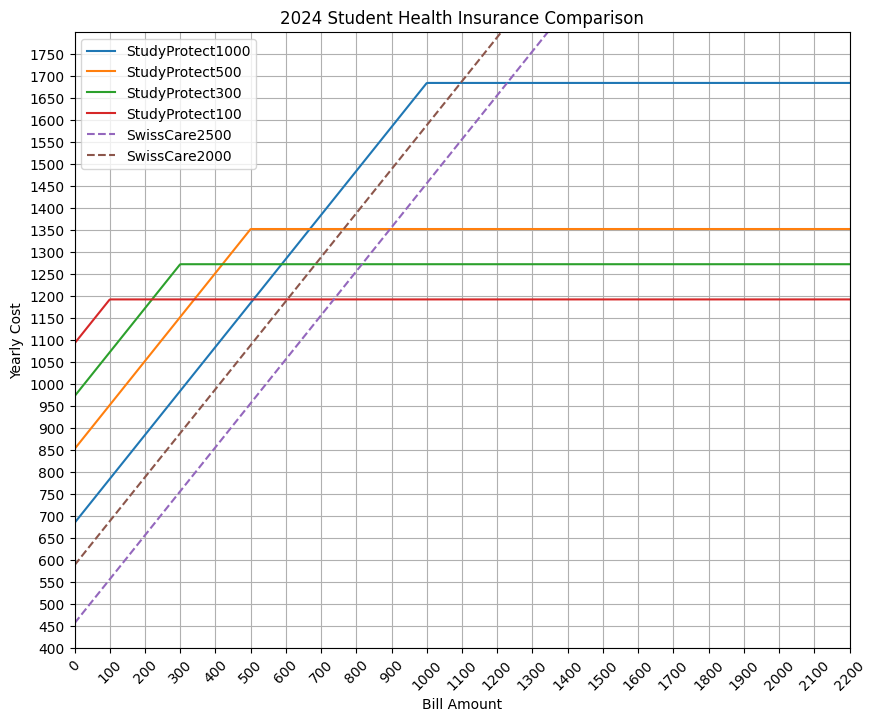

In [ ]:
study_protects = (StudyProtect(deductibles=1000, price_per_month=57)
,StudyProtect(deductibles=500, price_per_month=71)
,StudyProtect(deductibles=300, price_per_month=81)
,StudyProtect(deductibles=100, price_per_month=91)
,SwissCare(2500,38)
,SwissCare(2000,49))

def plot_insurance_analysis(insurances):

  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111)
  bill_amount = np.linspace(0,2300,1000)
  for insurance in insurances:
    cost = insurance.get_yearly_cost(bill_amount)
    ax.plot(bill_amount,cost, insurance.plot_line, label=insurance.__class__.__name__+str(insurance.deductibles))
    ax.legend([insurance.__class__.__name__+str(insurance.deductibles) for insurance in insurances])

  plt.xticks(np.arange(0, 2300, 100), rotation=45)
  plt.yticks(np.arange(400, 1800, 50))
  plt.title('2024 Student Health Insurance Comparison')
  plt.ylim(400,1800)
  plt.xlim(0,2200)
  plt.xlabel('Bill Amount')
  plt.ylabel('Yearly Cost')
  plt.grid()
  plt.show()
plot_insurance_analysis(study_protects)

